# Mobile Price Prediction

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


## Target column: price_range
- 0: Low
- 1: Low middle
- 2: middle
- 3: high

In [4]:
# 이진 분류를 위해 0과 1클래스, 2,3 클래스를 임의로 합쳐준다
train['price_range'] = train.price_range.replace(1,0)
train['price_range'] = train.price_range.replace(2,3)
train['price_range'] = train.price_range.replace(3,1)

In [5]:
train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,1
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [6]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = train.iloc[:, :-1]
    y_target = train.iloc[:, -1]
    
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(train)

In [7]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
1    50.0
0    50.0
Name: price_range, dtype: float64
테스트 데이터 레이블 값 비율
1    50.0
0    50.0
Name: price_range, dtype: float64


In [9]:
# 각각의 training model들로 fit 시킨 후 정확도 비교
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier()
lr_clf = LogisticRegression()
rf_clf = RandomForestClassifier()

dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
lr_clf.fit(X_train,y_train)
pred_lr = lr_clf.predict(X_test)
rf_clf.fit(X_train,y_train)
pred_rf = rf_clf.predict(X_test)
print("Decision Tree Classifier 예측 정확도:{0:.4f}".format(accuracy_score(y_test,pred)))
print("Logistic Regression Classifier 예측 정확도:{0:.4f}".format(accuracy_score(y_test,pred_lr)))
print("Random Forest Classifier 예측 정확도:{0:.4f}".format(accuracy_score(y_test,pred_rf)))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Decision Tree Classifier 예측 정확도:0.9567
Logistic Regression Classifier 예측 정확도:0.8800
Random Forest Classifier 예측 정확도:0.9317


Text(0.5, 1.0, 'Feature Importances')

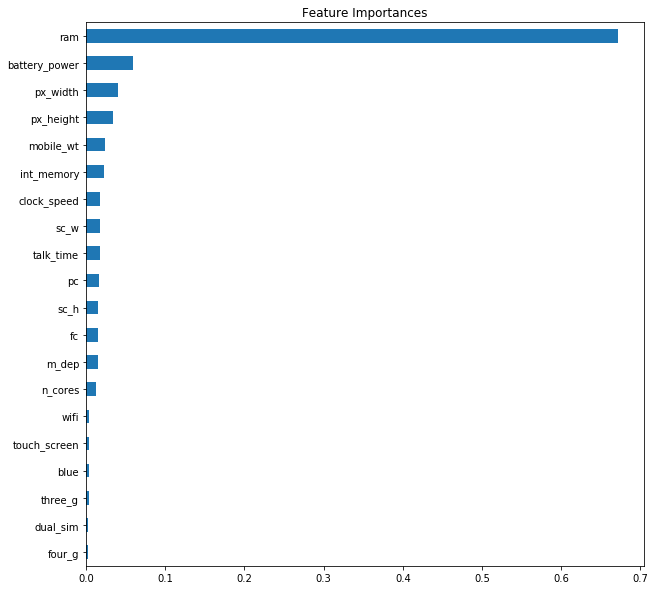

In [10]:
# feature_importance 살펴보기
fig = plt.figure(figsize=(10,10))
important = pd.Series(rf_clf.feature_importances_,index = X_train.columns)
important.sort_values().plot.barh()
plt.title('Feature Importances')

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

# 수정된 get_clf_eval() 함수 
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [12]:
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix, classification_report
# 오차행렬 살펴보기
print("오차행렬")
print(confusion_matrix(y_test,pred))

오차행렬
[[286  14]
 [ 14 286]]


In [24]:
from sklearn.metrics import average_precision_score
def crossval(datax,datay,model,cv=3):
    score = cross_val_score(model, datax, datay, cv=cv, scoring='accuracy')
    return(np.mean(score))

def plotting(ytest,pred):
    fig,ax=plt.subplots(1,2,figsize=(10,5))
    precision,recall,threshold=precision_recall_curve(ytest,pred[:,1])
    ax[0].plot(recall,precision,'g--')
    ax[0].set_xlabel('Recall')
    ax[0].set_ylabel('Precision')
    ax[0].set_title('Average Precision Score:{}'.format(average_precision_score(ytest,pred[:,1])))
    fpr,tpr,threshold=roc_curve(ytest,pred[:,1])
    ax[1].plot(fpr,tpr)
    ax[1].set_title("AUC Score is:{}".format(metrics.auc(fpr,tpr)))
    ax[1].plot([0,1],[0,1],'k--')
    ax[1].set_xlabel('False Positive Rate')
    ax[1].set_ylabel('True Positive Rate')

Accuracy is : 0.9400045338553394


Text(0.5, 1, 'f1 score=0.9533333333333334')

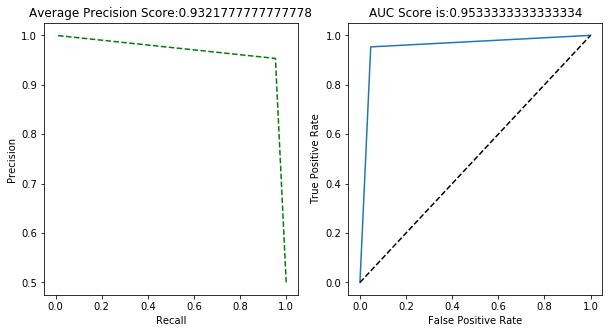

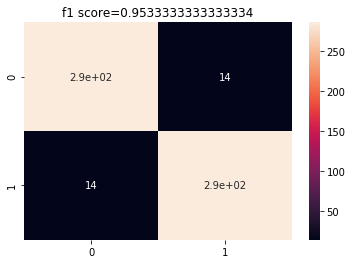

In [32]:
#from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import sklearn.metrics as metrics

score_df = crossval(X_train,y_train,dt_clf)
print('Accuracy is :',score_df)
plotting(y_test,dt_clf.predict_proba(X_test))
fig = plt.figure()
sns.heatmap(confusion_matrix(y_test,dt_clf.predict(X_test)),annot=True)
f1_score = metrics.f1_score(y_test, dt_clf.predict(X_test))
plt.title('f1 score={}'.format(f1_score))

In [33]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [37]:
from lightgbm import LGBMClassifier

print('### 로지스틱 회귀 예측 성능 ###')
dt_clf = DecisionTreeClassifier()
get_model_train_eval(dt_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[286  14]
 [ 14 286]]
정확도: 0.9533, 정밀도: 0.9533, 재현율: 0.9533,    F1: 0.9533, AUC:0.9533
### LightGBM 예측 성능 ###
오차 행렬
[[294   6]
 [ 19 281]]
정확도: 0.9583, 정밀도: 0.9791, 재현율: 0.9367,    F1: 0.9574, AUC:0.9969
